In [15]:
%reload_ext autoreload
%autoreload

import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0
import pandas as pd

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv

ser = serial.Serial('COM5', 9600, timeout=1)
dut.connect(ser)

In [14]:
dut.disconnect()

Serial port disconnected.


In [56]:
dut.pads_defaults()
dut.vrefs_off()
drv.gpio_pin_reset(*PIC_PINS['NRESET_FULL_CHIP'])
drv.gpio_pin_reset(*PIC_PINS['NRESET_DPE_ENGINE'])
drv.gpio_pin_reset(*PIC_PINS['PWR_GOOD'])

In [17]:
dut.power_on()

In [80]:
dut.pads_defaults()
dut.vrefs_off()
drv.gpio_pin_reset(*PIC_PINS['NRESET_FULL_CHIP'])
drv.gpio_pin_reset(*PIC_PINS['NRESET_DPE_ENGINE'])
drv.gpio_pin_reset(*PIC_PINS['PWR_GOOD'])

In [18]:
drv.gpio_pin_set('H',1)

In [6]:
drv.gpio_pin_set(*PIC_PINS['PIC_SHORT_VREF_HI_CMP'])

In [39]:
drv.clk_stop('ADC_CK')

In [47]:
drv.clk_config('ADC_CK', divisor=20)

Setting freq=5000.0kHz


In [40]:
drv.clk_start('ADC_CK')

In [7]:
dut.vrefs_defaults()

In [51]:
dut.dac_set('DAC_VREF_HI_CMP', 3.81)

In [54]:
volt_in = np.arange(0.5, 4, 0.002)
volt_out_list = []
adc_raw = []
# Array 0: [4, 5, 10, 11]
# Array 1: [2, 3, 8, 9]
# Array 2: [0, 1, 6, 7]
for addr_fifo in [2, 3, 8, 9]:
    print(addr_fifo, end='->')
    data = dut.calibrate_adc(volt_in, addr_fifo=addr_fifo, array=0b010 )
    volt_out_list.append( [dut.adc2volt(int(d,2), 4, 0.5) for d in data])
    adc_raw.append(data)
my_df_adc = pd.DataFrame(adc_raw)
my_df_volt = pd.DataFrame(volt_out_list)
concat_df = pd.concat([my_df_adc,my_df_volt]).sort_index().reset_index(drop=True)
concat_df = concat_df.transpose()
concat_df.to_csv('ADC_output_array1_110mv_lower_vref_cmp.csv', index=False, header=False)

2->3->8->9->

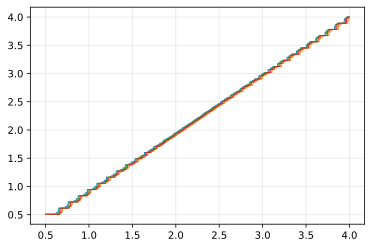

In [55]:
plt.grid(True, alpha=0.3)
for volt_out in volt_out_list:
    plt.plot(volt_in, volt_out, linewidth=1)

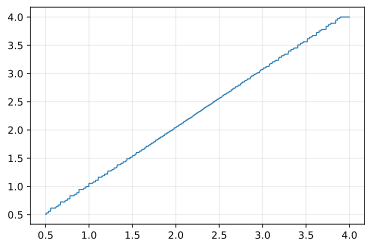

In [66]:
plt.grid(True, alpha=0.3)
plt.plot(volt_in, volt_out_list[4], linewidth=1)

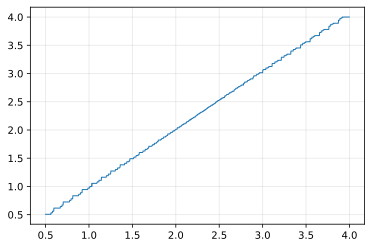

In [67]:
plt.grid(True, alpha=0.3)
plt.plot(volt_in, volt_out_list[5], linewidth=1)

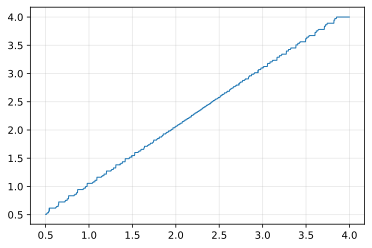

In [68]:
plt.grid(True, alpha=0.3)
plt.plot(volt_in, volt_out_list[10], linewidth=1)

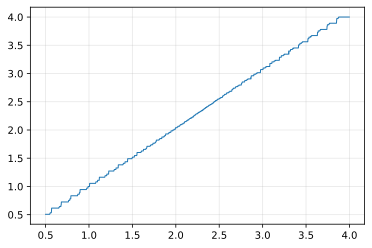

In [69]:
plt.grid(True, alpha=0.3)
plt.plot(volt_in, volt_out_list[11], linewidth=1)

In [ ]:
plt.grid(True, alpha=0.3)
plt.plot(volt_in, volt_out_list[2], linewidth=1)

In [ ]:
plt.grid(True, alpha=0.3)
plt.plot(volt_in, volt_out_list[3], linewidth=1)

In [ ]:
plt.grid(True, alpha=0.3)
plt.plot(volt_in, volt_out_list[8], linewidth=1)

In [ ]:
plt.grid(True, alpha=0.3)
plt.plot(volt_in, volt_out_list[9], linewidth=1)

In [ ]:
plt.grid(True, alpha=0.3)
plt.plot(volt_in, volt_out_list[0], linewidth=1)

In [ ]:
plt.grid(True, alpha=0.3)
plt.plot(volt_in, volt_out_list[1], linewidth=1)

In [ ]:
plt.grid(True, alpha=0.3)
plt.plot(volt_in, volt_out_list[6], linewidth=1)

In [ ]:
plt.grid(True, alpha=0.3)
plt.plot(volt_in, volt_out_list[7], linewidth=1)